In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_can = pd.read_excel("C:\\Users\\rtran\\Downloads\\Canada.xlsx",
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
all(isinstance(column, str) for column in df_can.columns)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
years = list(map(str, range(1980, 2014)))
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'Region', 'DevName'], axis=1, inplace=True)
df_can.head()

,Country,Continent,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
df_can.tail()

,Country,Continent,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Viet Nam,Asia,1191,1829,2162,3404,7583,5907,2741,1406,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,1,2,1,6,0,18,7,12,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,11,17,11,7,16,9,15,23,...,56,91,77,71,64,60,102,69,46,59
194,Zimbabwe,Africa,72,114,102,44,32,29,43,68,...,1450,615,454,663,611,508,494,434,437,407


In [30]:
df_can.iloc[79, [0,3, 4, 5, 6, 7, 8]]

Country    India
1981        8670
1982        8147
1983        7338
1984        5704
1985        4211
1986        7150
Name: 79, dtype: object

In [31]:

df_can.iloc[36, [0,3, 4, 5, 6, 7, 8]]

Country    China
1981        6682
1982        3308
1983        1863
1984        1527
1985        1816
1986        1960
Name: 36, dtype: object

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df_ci = df_can.iloc[[36, 79], :]
df_ci

,Country,Continent,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
36,China,Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
79,India,Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [35]:
total_values = df_ci[2013].sum()
category_proportions = df_ci[2013] / total_values
pd.DataFrame({"Category Proportion": category_proportions})
width = 15 # width 
height = 12 # height 
total_num_tiles = width * height 
print(f'Total number of tiles is {total_num_tiles}.')
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)
pd.DataFrame({"Number of tiles": tiles_per_category})

Total number of tiles is 180.


,Number of tiles
36,91
79,89


In [36]:
waffle_chart = np.zeros((height, width), dtype = np.uint)
category_index = 0
tile_index = 0
for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1       
            
        waffle_chart[row, col] = category_index
print ('Waffle chart populated!')

Waffle chart populated!


<Figure size 640x480 with 0 Axes>

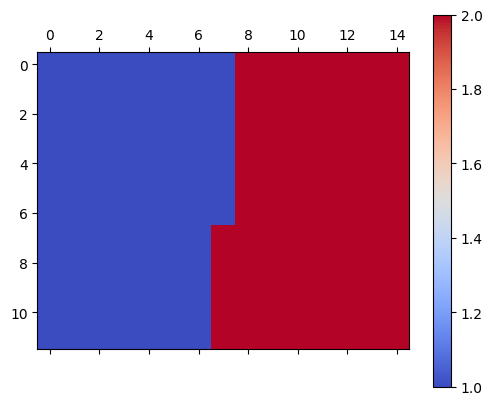

In [38]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

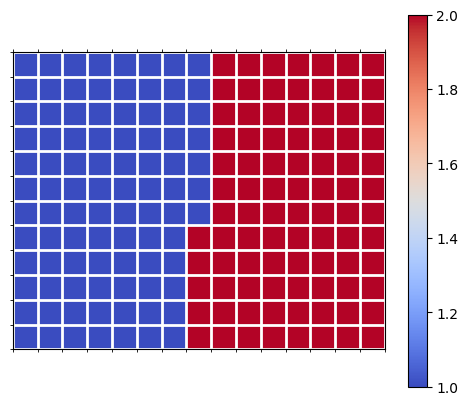

In [39]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])
plt.show()

In [41]:
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents.drop(['Country'], axis=1, inplace=True)
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503


In [42]:
import pandas as pd
df_tot = pd.DataFrame(df_continents.sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


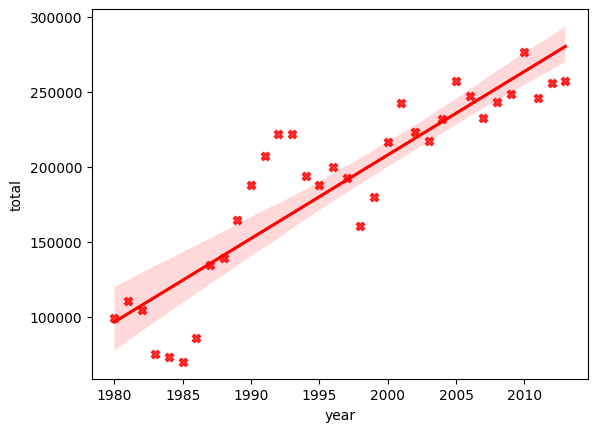

In [44]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='red', marker='X')

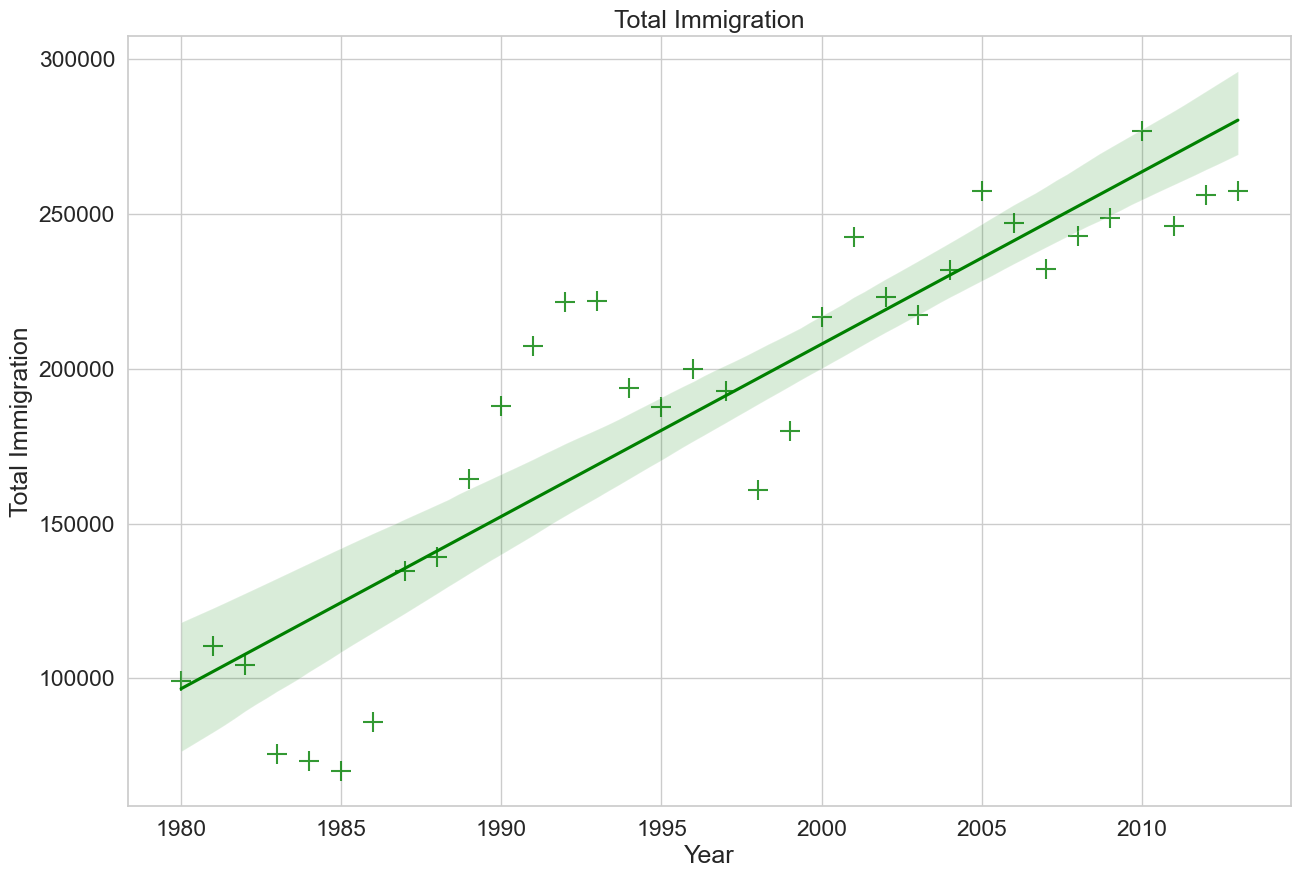

In [45]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration')
plt.show()